In [563]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [526]:
data=pd.read_csv('diabetes.csv')
data.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [572]:
X=data[['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'Age']]
Y=data['outcome']


In [573]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
logr=linear_model.LogisticRegression()
logr.fit(x_train.values,y_train)
simple_detectetion=prediction=logr.predict([[4, 150, 90, 210, 33.1, 45]])


In [574]:
print(simple_detectetion)

[1]


In [575]:
logr=SVC(random_state=0)

In [576]:
logr.fit(x_train, y_train)


SVC(random_state=0)

In [577]:
y_predict=logr.predict(x_test)


In [578]:
cm=confusion_matrix(y_test,y_predict, labels=logr.classes_)

In [579]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)

In [580]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.76      0.55      0.64        47

    accuracy                           0.81       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.81      0.81      0.80       154



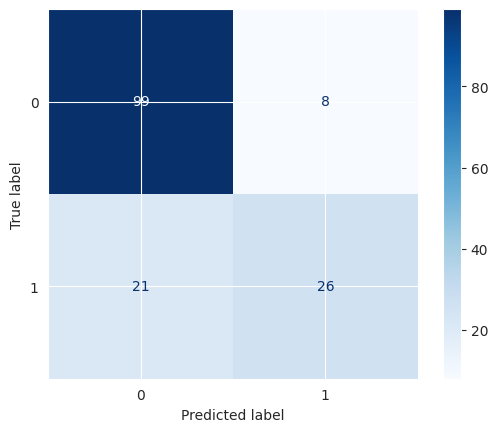

In [581]:
disp.plot(cmap="Blues")
plt.show()

In [582]:
print('El accuracy del modelo de regresion logistica es: ', accuracy_score(y_predict,y_test))

El accuracy del modelo de regresion logistica es:  0.8116883116883117


# Oversampling

In [583]:
ran=RandomOverSampler(sampling_strategy=0.6, random_state=0)
x_ran,y_ran=ran.fit_resample(x_train,y_train)

In [619]:
over=LogisticRegression(max_iter=700)
over.fit(x_ran,y_ran)

LogisticRegression(max_iter=700)

In [585]:
mdbalg_tree=DecisionTreeClassifier(random_state=120)
mdbalg_tree.fit(x_ran,y_ran)

DecisionTreeClassifier(random_state=120)

In [629]:
over_log=over.predict(x_test)
predbalg_log_predictt=over.predict_proba(x_test)[:,1]

predbalg_log_tree=mdbalg_tree.predict(x_test)
predbalg_tree_predictt=mdbalg_tree.predict_proba(x_test)[:,1]

In [630]:
print(classification_report(y_test, over_log))
print(classification_report(y_test, predbalg_log_tree))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       107
           1       0.57      0.66      0.61        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



In [631]:
cm=confusion_matrix(y_test,over_log)

In [632]:
dist=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)

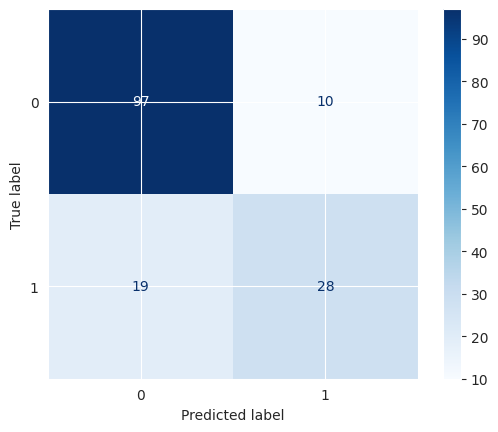

In [633]:
dist.plot(cmap="Blues")
plt.show()

In [634]:
print("auc logistica",roc_auc_score(y_test,predbalg_log_predictt))
print("auc logistica",roc_auc_score(y_test,predbalg_log_tree))

auc logistica 0.8492742095844104
auc logistica 0.7223105985285345


# Undersampling

In [635]:
input_data=pd.DataFrame([[4, 150, 90, 210, 33.1, 45]], columns=['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'Age'])
method_over=over.predict(input_data)
print(method_over)

[1]


In [636]:
ran=RandomUnderSampler(sampling_strategy=0.5)

In [637]:
under=LogisticRegression(max_iter=300)
decision_tree=DecisionTreeClassifier(random_state=80)

In [638]:
under.fit(x_ran,y_ran)
decision_tree.fit(x_ran,y_ran)

DecisionTreeClassifier(random_state=80)

In [639]:
under_log=under.predict(x_test)
under_log_predict=under.predict_proba(x_test)[:,1]

decision_tree_log=decision_tree.predict(x_test)
decision_tree_prob=decision_tree.predict_proba(x_test)[:,1]

In [610]:
print("auc logistica",roc_auc_score(y_test,under_log_predict))
print("auc logistica",roc_auc_score(y_test,decision_tree_prob))

auc logistica 0.8492742095844104
auc logistica 0.7176377013322728


In [611]:
print(classification_report(y_test, under_log))
print(classification_report(y_test, decision_tree_log))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       107
           1       0.56      0.66      0.61        47

    accuracy                           0.74       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.75      0.74      0.75       154



In [612]:
cmUNder=confusion_matrix(y_test,under_log)

In [613]:
distUnder=ConfusionMatrixDisplay(confusion_matrix=cmUNder, display_labels=logr.classes_)

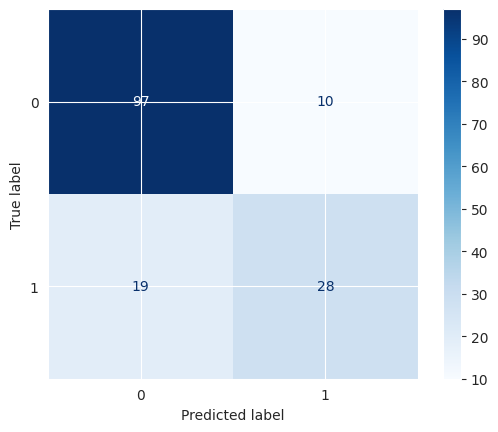

In [645]:
distUnder.plot(cmap="Blues")
plt.show()

In [615]:
input_data=pd.DataFrame([[4, 150, 90, 210, 33.1, 45]], columns=['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'Age'])
method_over=under.predict(input_data)
print(method_over)

[1]


In [616]:
import pickle

In [643]:
model=pickle.dump(over,open('diabetes_model.pkl', 'wb'))

In [646]:
data=[[6,148,72,0,33.6,50]]
df=pd.DataFrame(data, columns=['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'Age'])

new_pred=over.predict(df)
new_pred

array([1])

In [647]:
if new_pred==1:
    print("diabetes detected")
else:
    print("diabetes not detected")

diabetes detected
